In [353]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [354]:
tsla = pd.read_csv("TSLA.csv", parse_dates=['Date'], index_col="Date")
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [355]:
tsla = tsla.drop('Close', axis=1)
tsla = tsla.rename(columns={"Adj Close": "Close"})
tsla

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...
2020-07-29,1501.000000,1534.810059,1487.000000,1499.109985,9426900
2020-07-30,1488.000000,1513.239990,1471.000000,1487.489990,7621000
2020-07-31,1515.000000,1517.050049,1420.979980,1430.760010,12247000


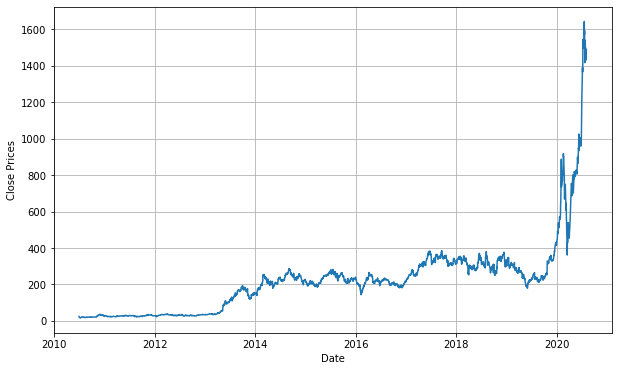

In [356]:
# Visualize the stock’s daily closing price.
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(tsla['Close'])
#plt.title('TESLA closing price')
plt.show()

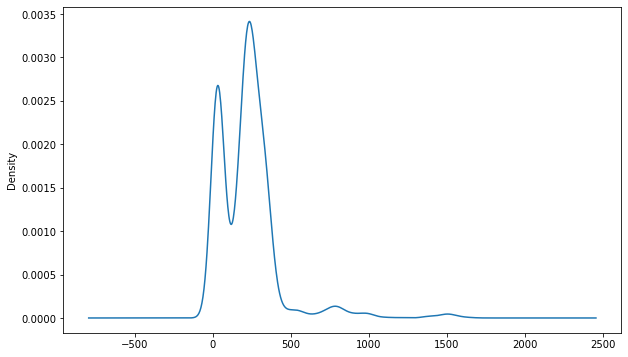

In [357]:
# Probability Distribution of the dataset
tsla_close = tsla['Close']
tsla_close.plot(kind='kde')
plt.show()

In [358]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(tsla['Close'])

KPSS Statistic: 5.425313951109967
p-value: 0.01
num lags: 27
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


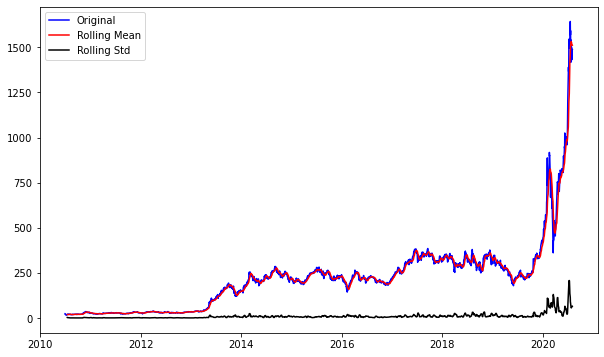

Results of dickey fuller test
Test Statistics                   3.728795
p-value                           1.000000
No. of lags used                 26.000000
Number of observations used    2516.000000
critical value (1%)              -3.432952
critical value (5%)              -2.862689
critical value (10%)             -2.567382
dtype: float64


In [359]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    #plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(tsla['Close'])

<Figure size 720x432 with 0 Axes>

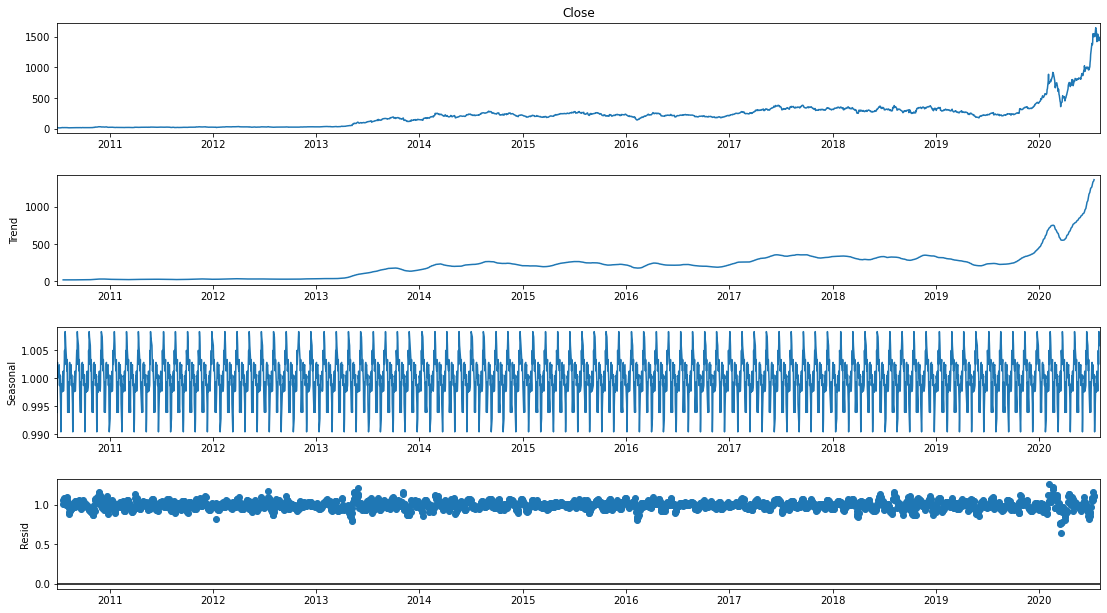

In [360]:
result = seasonal_decompose(tsla['Close'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)
plt.show()

No handles with labels found to put in legend.


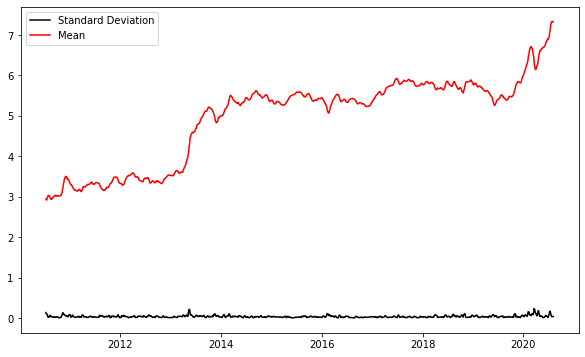

In [361]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(tsla['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
#plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [362]:
#diff= df_log.diff().dropna()

In [363]:
#test_stationarity(df_log.diff().dropna())

In [344]:
tsla['Close']=diff

In [364]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df_log)

KPSS Statistic: 7.547711398603199
p-value: 0.01
num lags: 27
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


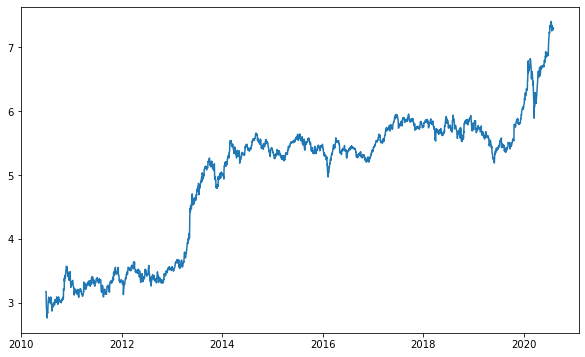

In [365]:
plt.plot(df_log)

In [287]:
# MA Function
import datetime
import warnings
warnings.filterwarnings('ignore')

def MovingAverage(df, start_date = '1996-01-02', end_date = '2020-08-06', 
                               short_window = 20, long_window = 50, moving_avg = 'SMA'):
    '''
    The function takes the dataset, time-duration of analysis, 
    look-back periods and the moving-average type(SMA or EMA) as input 
    and returns the respective MA Crossover chart along with the buy/sell signals for the given period.
    '''
    # start_date - (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    # end_date - (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    # short_window - (int)lookback period for short-term moving average. Eg: 5, 10, 20 
    # long_window - (int)lookback period for long-term moving average. Eg: 50, 100, 200
    # moving_avg - (str)the type of moving average to use ('SMA' or 'EMA')
    # display_table - (bool)whether to display the date and price table at buy/sell positions(True/False)
    
    #df['Close'] = df.loc[start_date:end_date,'Close'] # assign new colun name
    df.dropna(axis = 0, inplace = True) # remove any null rows 
    
    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  
  
    if moving_avg == 'SMA':
        # Create a short simple moving average column
        df[short_window_col] = df['Close'].rolling(window = short_window, min_periods = 1).mean()

        # Create a long simple moving average column
        df[long_window_col] = df['Close'].rolling(window = long_window, min_periods = 1).mean()

    elif moving_avg == 'EMA':
        # Create short exponential moving average column
        df[short_window_col] = df['Close'].ewm(span = short_window, adjust = False).mean()

        # Create a long exponential moving average column
        df[long_window_col] = df['Close'].ewm(span = long_window, adjust = False).mean()
MovingAverage(tsla)

In [288]:
# MACD Function
def get_macd(df, slow=26, fast=12, smooth=9, start_date = '1996-01-02', end_date = '2020-08-06',):
    # isolate the closing price
    closingPrice = df.loc[start_date:end_date,'Close']
    
    exp1 = closingPrice.ewm(span = fast, adjust = False).mean()
    exp2 = closingPrice.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'MACD'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'MACD':'MACD_Signal'})
    hist = pd.DataFrame(macd['MACD'] - signal['MACD_Signal']).rename(columns = {0:'Hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df
get_macd(tsla)

,MACD,MACD_Signal,Hist
Date,,,
2010-06-30,0.000000,0.000000,0.000000
2010-07-01,-0.144388,-0.028878,-0.115510
2010-07-02,-0.326863,-0.088475,-0.238389
2010-07-06,-0.492429,-0.169265,-0.323163
2010-07-07,-0.394767,-0.214366,-0.180401
...,...,...,...
2020-07-29,-7.700956,-5.368453,-2.332503
2020-07-30,-8.253149,-5.945392,-2.307757
2020-07-31,-12.190244,-7.194362,-4.995881


In [289]:
# drop histogram column, as we will not use it
tsla= pd.concat([tsla,get_macd(tsla)], axis=1)
tsla.drop(['Hist'], axis=1, inplace=True)

In [290]:
# RSI Function
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

tsla['RSI_14'] = get_rsi(tsla['Close'], 14)
tsla = tsla.dropna()
tsla

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14
Date,,,,,,,,,,
2010-07-07,16.400000,16.629999,14.980000,-0.310001,6921700,-1.618000,-1.618000,-0.394767,-0.214366,52.423002
2010-07-08,16.139999,17.520000,15.570000,1.659999,7711400,-1.071667,-1.071667,-0.156602,-0.202813,66.017954
2010-07-09,17.580000,17.900000,16.549999,-0.059999,4050600,-0.927143,-0.927143,-0.105428,-0.183336,52.036937
2010-07-12,17.950001,18.070000,17.000000,-0.350001,2202500,-0.855000,-0.855000,-0.087267,-0.164122,50.110037
2010-07-13,17.389999,18.639999,16.900000,1.090000,2680100,-0.638889,-0.638889,0.042827,-0.122732,58.356079
...,...,...,...,...,...,...,...,...,...,...
2020-07-29,1501.000000,1534.810059,1487.000000,22.619995,9426900,20.964996,13.709600,-7.700956,-5.368453,50.504410
2020-07-30,1488.000000,1513.239990,1471.000000,-11.619995,7621000,18.392999,13.589600,-8.253149,-5.945392,49.116530
2020-07-31,1515.000000,1517.050049,1420.979980,-56.729980,12247000,11.104999,12.304000,-12.190244,-7.194362,47.273369


In [291]:
# BB Function
def BollingerBand(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb
tsla['Upper_BB'], tsla['Lower_BB'] = BollingerBand(tsla['Close'], tsla['20_SMA'], 20)
tsla.dropna(inplace=True)
tsla

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB
Date,,,,,,,,,,,,
2010-08-03,21.000000,21.950001,20.820000,1.030001,1230500,0.292000,-0.080833,0.146799,0.079485,55.248851,1.974750,-1.390750
2010-08-04,21.950001,22.180000,20.850000,-0.690001,913000,0.273000,-0.105200,0.062963,0.076181,46.490021,1.992549,-1.446549
2010-08-05,21.540001,21.549999,20.049999,-0.809999,796200,0.149500,-0.132308,-0.013012,0.058342,45.942791,1.803147,-1.504147
2010-08-06,20.100000,20.160000,19.520000,-0.860001,741900,0.109500,-0.159259,-0.076376,0.031399,45.701391,1.822135,-1.603135
2010-08-09,19.900000,19.980000,19.450001,0.010000,812700,0.127500,-0.153214,-0.055748,0.013969,50.568195,1.827320,-1.572320
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-29,1501.000000,1534.810059,1487.000000,22.619995,9426900,20.964996,13.709600,-7.700956,-5.368453,50.504410,178.945247,-137.015255
2020-07-30,1488.000000,1513.239990,1471.000000,-11.619995,7621000,18.392999,13.589600,-8.253149,-5.945392,49.116530,176.755227,-139.969229
2020-07-31,1515.000000,1517.050049,1420.979980,-56.729980,12247000,11.104999,12.304000,-12.190244,-7.194362,47.273369,169.195513,-146.985515


In [347]:
# drop ‘Open’, ‘Low’, ‘High’, and ‘Volume’ columns 
tsla.drop(['Open', 'High','Low','Volume'], axis=1, inplace=True)

In [348]:
tsla.head()

,Close
Date,
2010-06-29,NaN
2010-06-30,-0.002515
2010-07-01,-0.081723
2010-07-02,-0.134312
2010-07-06,-0.175470


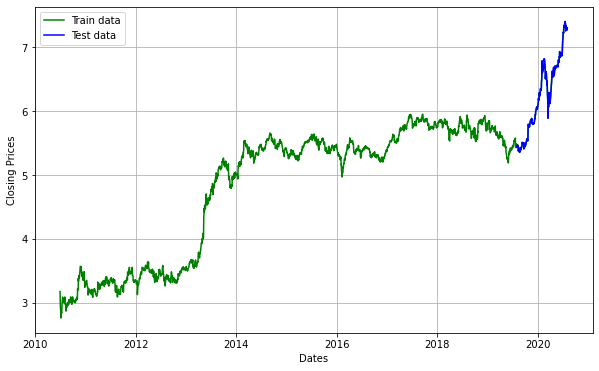

In [366]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [367]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9205.440, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9203.860, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9203.887, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9204.737, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9203.295, Time=0.85 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.958 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2285
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4604.720
Date:                Thu, 23 Sep 2021   AIC                          -9205.440
Time:                        16:34:19   BIC                          -9193.972
Sample:                             0   HQIC                         -9201.257
                               - 2285                                  

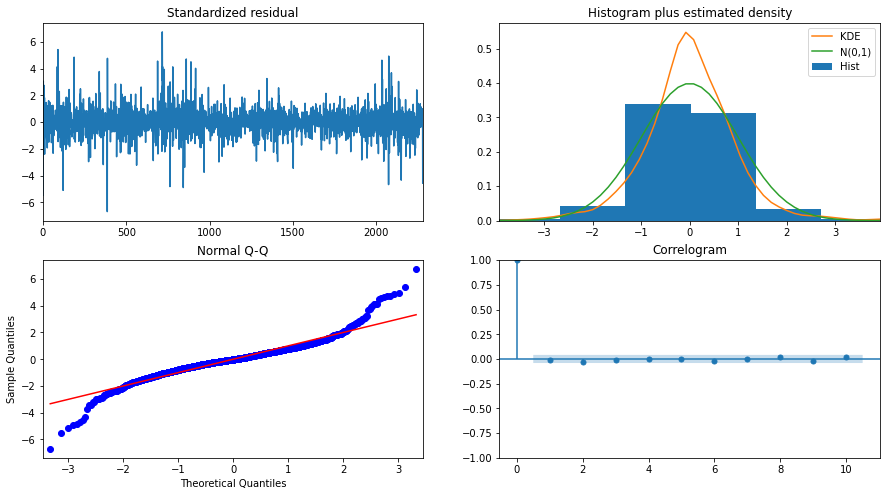

In [368]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [369]:
model = ARIMA(train_data, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2284
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4604.720
Method:                           css   S.D. of innovations              0.032
Date:                Thu, 23 Sep 2021   AIC                          -9205.440
Time:                        16:35:32   BIC                          -9193.972
Sample:                             1   HQIC                         -9201.257
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.644      0.100      -0.000       0.002


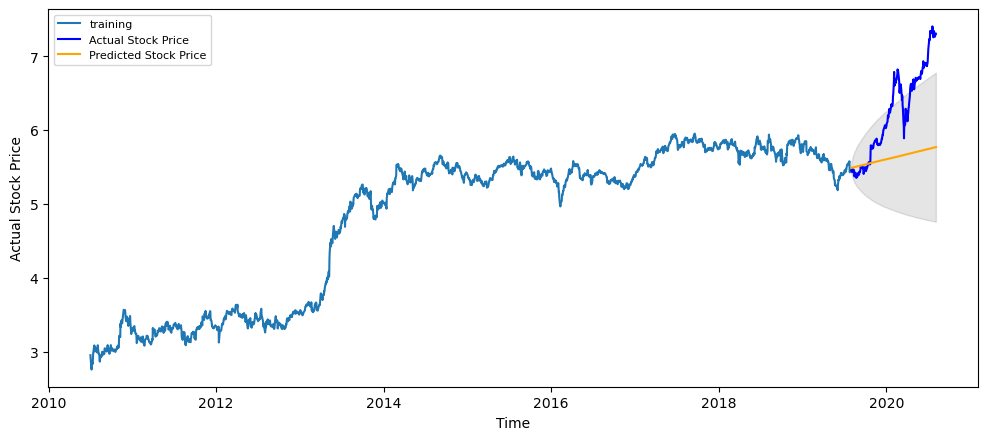

In [372]:
# Forecast
fc, se, conf = fitted.forecast(255, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
#plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [373]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.6343395688680314
MAE: 0.635968415620833
RMSE: 0.7964543733749169
MAPE: 0.09567458755781383


https://www.kdnuggets.com/2020/01/stock-market-forecasting-time-series-analysis.html